# Lab 10 Exercises : Montecarlo

1\. (done) **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

halflife: 183.12


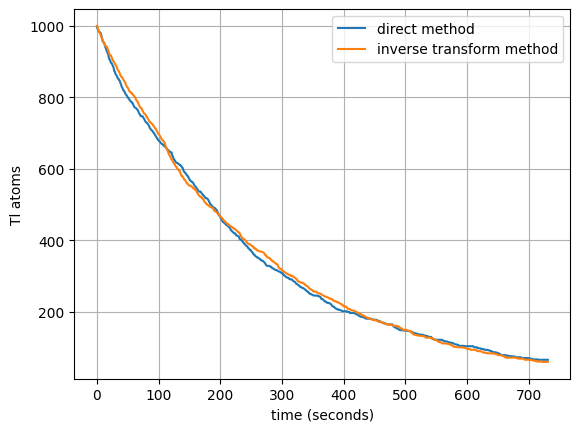

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr


T_half = 3.052*60 # seconds
print("halflife:" , T_half)
T_max = int(4*T_half)
N_0 = 1000

atoms = np.ones(N_0) # at start they are all present
N_t = np.ones(T_max)

survival_probability = 2**(-1/T_half) # memoryless!!!

for t in np.arange(0, T_max):
    for i in range(N_0):
        if atoms[i] == 1:
            z = npr.random() 
            atoms[i] = 1 if (z <= survival_probability) else 0
    N_t[t] = np.sum(atoms)

plt.plot(np.arange(0, T_max), N_t, label = "direct method")
plt.grid()


# analytical inverse transform method
N = np.ones(T_max)

mu = np.log(2)/T_half
z_array = npr.random(size = N_0)
time_array = - (1/mu)*np.log(1-z_array)

for t in np.arange(0, T_max):
    array = time_array.copy()
    N[t] = np.sum(np.ones(len(array[array > t])))

plt.plot(np.arange(0, T_max), N, label = "inverse transform method")
plt.grid(visible = True)
plt.xlabel("time (seconds)")
plt.ylabel("Tl atoms")
plt.legend()

2\. (done)**Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

**Answer**

$\tan(\frac{\pi}{4}) = 1 $, therefore the condition on b is $b \leq \frac{Z e^2} {2\pi \epsilon_0 E}$. It is convenient to use natural units, where $e = 1, me = 1, 4\pi\epsilon_0 = 1, \hbar = 1, a_0 = 1$ .

Lengths are measured in units of the Bohr radius $(a_0 = 1)$, energies are measured in Hartrees, with the conversion $1\, hartree = 27.211\, eV$.



The exercise does not specify wheter the beam can approach the gold target from a given, fixed direction (in which case, only the perpendicular displacement matters ($b=x$) or from any direction in 2D space (in which case, $b=\sqrt{x^2 + y^2})$. I compute the fraction in the two cases for completeness.

**Answer**

$\tan(\frac{\pi}{4}) = 1 $, therefore the condition on b is $b \leq \frac{Z e^2} {2\pi \epsilon_0 E}$. It is convenient to use natural units, where $e = 1, me = 1, 4\pi\epsilon_0 = 1, \hbar = 1, a_0 = 1$ .

Lengths are measured in units of the Bohr radius $(a_0 = 1)$, energies are measured in Hartrees, with the conversion $1\, hartree = 27.211\, eV$.



The exercise does not specify wheter the beam can approach the gold target from a given, fixed direction (in which case, only the perpendicular displacement matters: $b=x$) or from any direction in 2D space (in which case, $b=\sqrt{x^2 + y^2}$.) I compute the fraction in the two cases for completeness.

In [21]:
# First case: beam comes from fixed direction

import numpy as np
from scipy.stats import norm

E = 7.7 * 10**6/27.211 # hartree
Z = 79
b_max = 2*Z/E  # natural units
print(b_max)
sigma =  1/100 # natural units

z_max = b_max/sigma
# Compute the expectation value of the "bounce-back" fraction
integral = norm.cdf(x= z_max, loc = 0, scale = 1) - norm.cdf(x= -z_max, loc = 0, scale = 1)
print("Expectation value:", integral)

# Sample event
b_values = norm.rvs(loc = 0, scale = sigma, size = 10**6)
N_bounced = len(b_values[np.abs(b_values) < b_max])
print("Fraction (one sample beam):", N_bounced/10**6) # Hit-miss Montecarlo

0.0005583555844155845
Expectation value: 0.04452719242280995
Fraction (one sample beam): 0.044442


In [22]:
# Second case: beam comes from any direction

# Sample event
x_values = norm.rvs(loc = 0, scale = sigma, size = 10**6)
y_values = norm.rvs(loc = 0, scale = sigma, size = 10**6)
b_values = np.sqrt(x_values**2 + y_values**2)
N_bounced = len(b_values[np.abs(b_values) < b_max])
print("Fraction (one sample beam):", N_bounced/10**6) # Hit-miss Montecarlo

Fraction (one sample beam): 0.00155


3\. **(done) Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

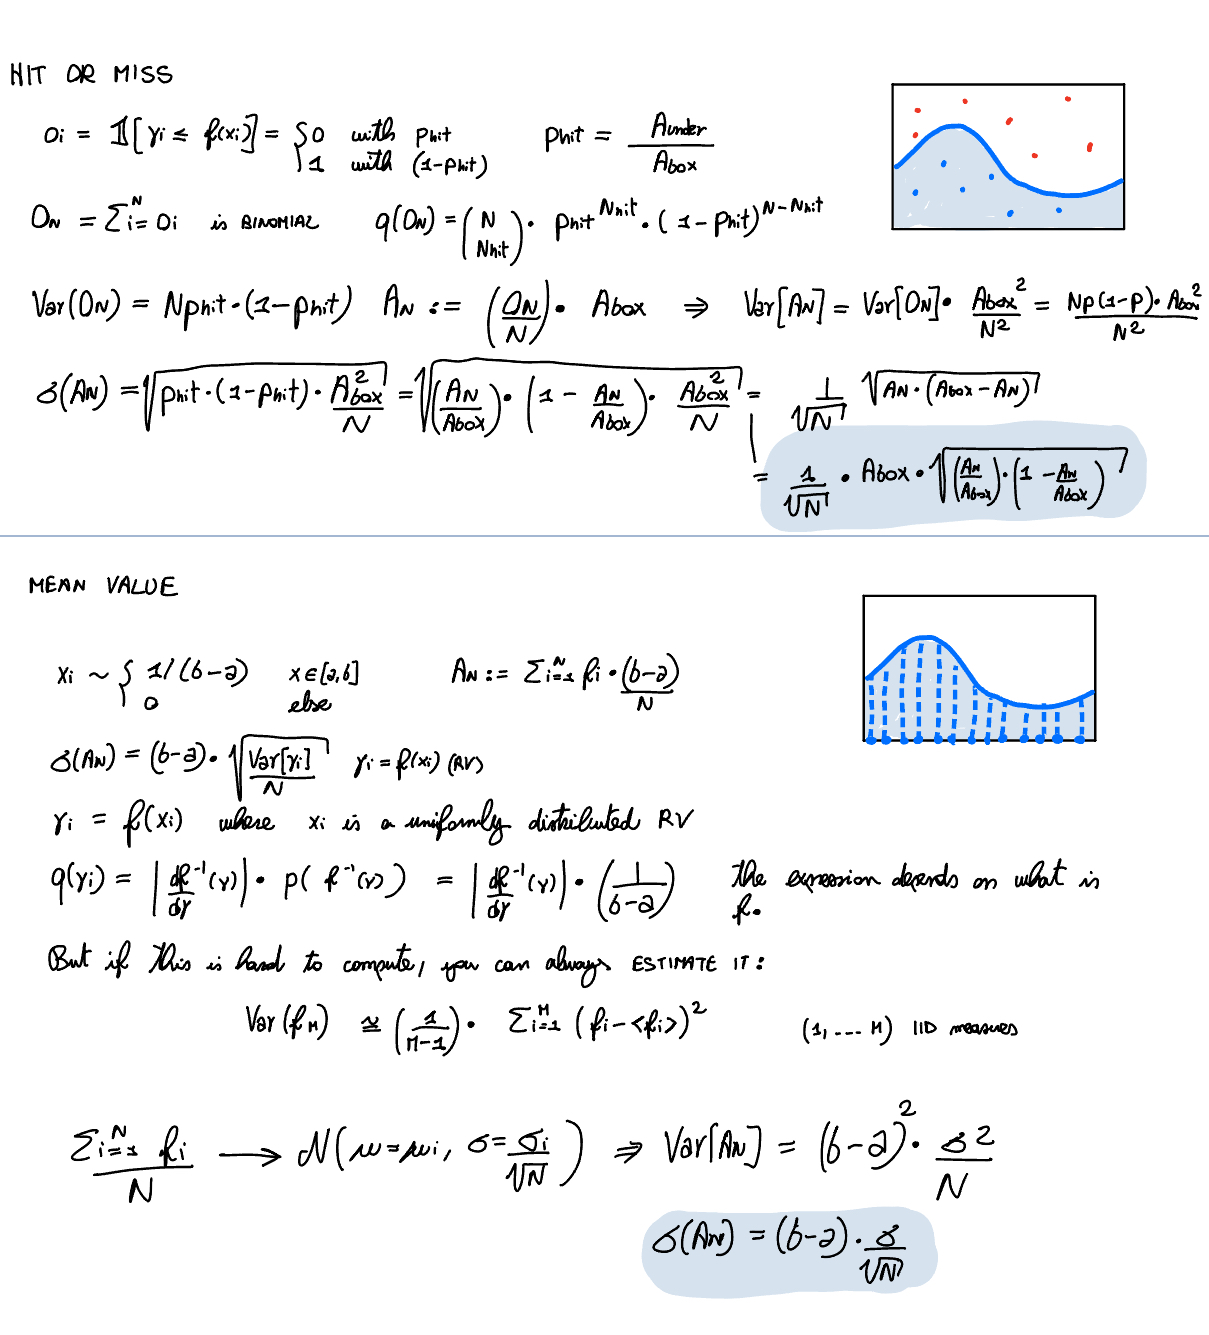

In [8]:
from IPython.display import Image
Image("errors_integration.jpeg")

In [7]:
import numpy as np
import numpy.random as npr

import matplotlib.pyplot as plt

def f(x):
    return np.sin(1 / (x*( 2-x)) )**2

N = 100000

# Hit/miss method
box_area = 2
xs = 2 * npr.random(size = N)
ys = npr.random(size = N)
fraction = np.sum([1 if ys[i] <= f(xs[i]) else 0 for i in range(N)])/N
error = 1/np.sqrt(N) * box_area * np.sqrt(fraction * (1-fraction))
print("Integral", fraction*box_area , "pm", error)

# Mean value method
delta_x = 2
xs = 2 * npr.random(size = N)
integral = np.sum(f(xs))/N * delta_x
error = 1/np.sqrt(N) * delta_x * np.sqrt(np.var(f(xs), ddof = 1) )# unbiased sample variance
print("Integral", integral , "pm", error)


Integral 1.4496 pm 0.0028246412869601684
Integral 1.4492236666038536 pm 0.0016712719761869165


4\. **(done) Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [19]:
import numpy as np
import numpy.random as npr

# Hit- miss method
N = 100000

# 2D
d = 2
V = 2**d
variates = npr.random(size = (d, N))
radius_square =  np.sum(variates**2, axis=0)
fraction = np.sum([1 if radius_square <= 1 else 0 for radius_square in radius_square])/N
integral = fraction * V
error = 1/np.sqrt(N) * np.sqrt(fraction * (1-fraction)) * V
print("Integral", integral , "pm", error)

# 10D
d = 10
V = 2**d
variates = npr.random(size = (d, N))
radius_square =  np.sum(variates**2, axis=0)
fraction = np.sum([1 if radius_square <= 1 else 0 for radius_square in radius_square])/N
integral = fraction * V
error = 1/np.sqrt(N) * np.sqrt(fraction * (1-fraction)) * V
print("Integral", integral , "pm", error)

Integral 3.14468 pm 0.005186239193866784
Integral 2.37568 pm 0.15579000175035623


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

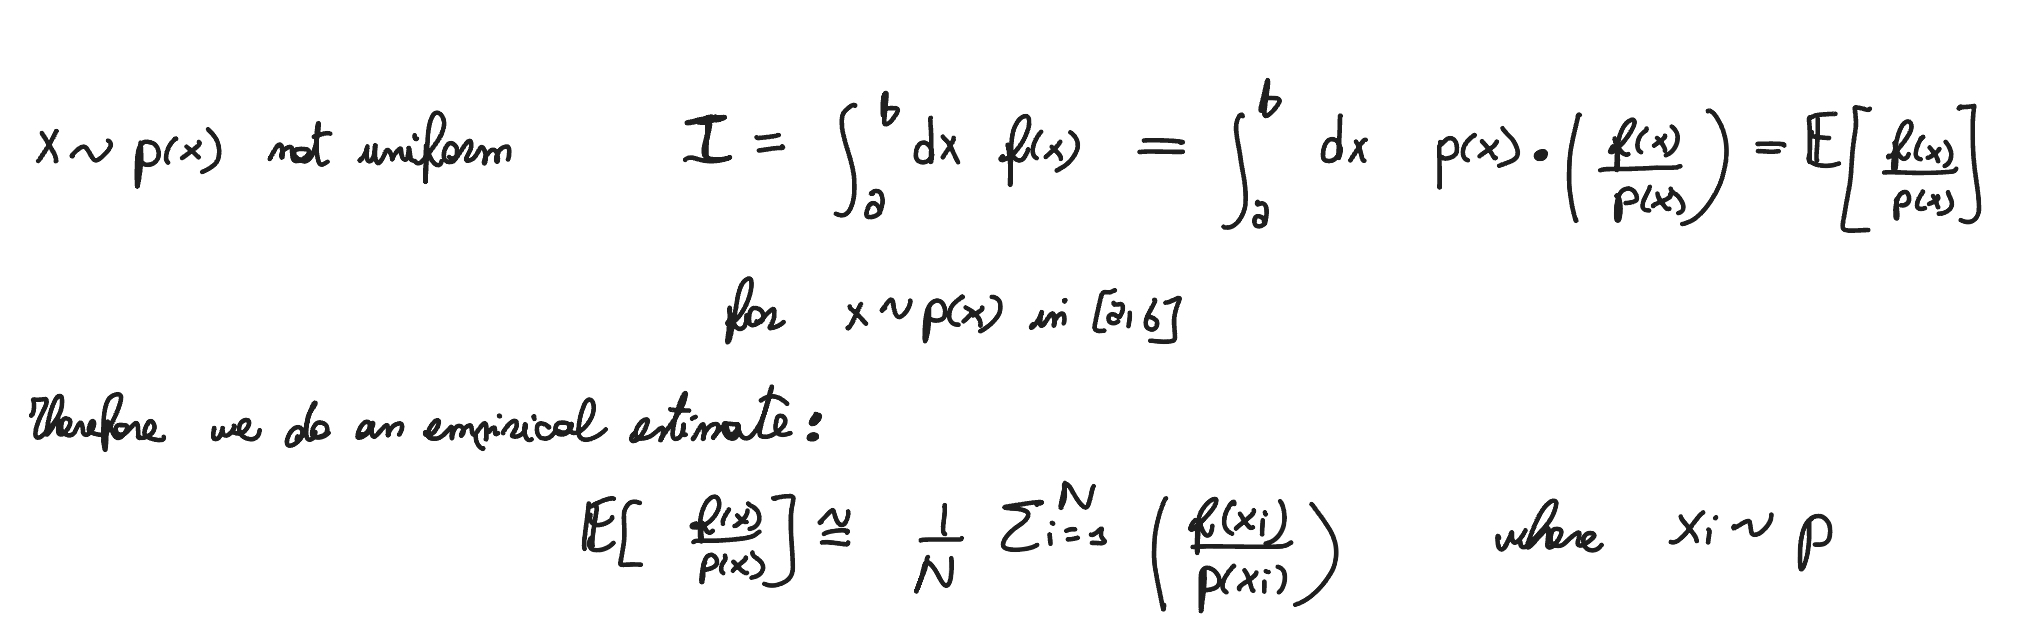

In [20]:
from IPython.display import Image
Image("importance_sampling.jpeg")

In [24]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

def f(x):
    return x**(-1/2) * (1/(np.exp(x) + 1))

N = 100000
z_variates = npr.random(N)
x_variates = z_variates ** 2 # these are distributed according to w(x) = (1/2)* x**(-1/2)
I = 1/N * np.sum(2/(np.exp(x_variates) + 1))
print(I)

0.8392111732035764


In [ ]:
from IPython.display import Image
Image("importance_sampling.jpeg")
